In [ ]:
 pip install pandas scikit-learn keras tensorflow nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pandas scikit-learn bangla-stemmer nltk

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bangla_stemmer.stemmer import stemmer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Sentiment Analysis Bangla.xlsx'
data = pd.read_excel(file_path)

print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                             comment    Category Gender  \
0                           গরীবেরা এভাবেই শীত কাটায়       Actor   Male   
1  তাসরিফ তোমায় মিউজিক ভিডিও করতে পাঠানো হয়েছে, ম...      Singer   Male   
2     জেল থেকে জানাই সবাইকে ' হ্যাপি ভ্যালেন্টাইন ডে  politician   Male   
3                   বাবুরে চারদিকে শুধু আগুন আর আগুন  politician   Male   
4  যে সংসদে মমতাজের জায়গা হয় সেই সংসদে হিরো আলম ক...  Politician   Male   

   comment react number      label  
0                2600.0      troll  
1                2000.0      troll  
2                1300.0      troll  
3                1000.0      troll  
4                 982.0  not bully  


In [ ]:
drop = ['Category','Gender', 'comment react number']
data = data.drop(columns=drop)
data.head()

,comment,label
0,গরীবেরা এভাবেই শীত কাটায়,troll
1,"তাসরিফ তোমায় মিউজিক ভিডিও করতে পাঠানো হয়েছে, ম...",troll
2,জেল থেকে জানাই সবাইকে ' হ্যাপি ভ্যালেন্টাইন ডে,troll
3,বাবুরে চারদিকে শুধু আগুন আর আগুন,troll
4,যে সংসদে মমতাজের জায়গা হয় সেই সংসদে হিরো আলম ক...,not bully


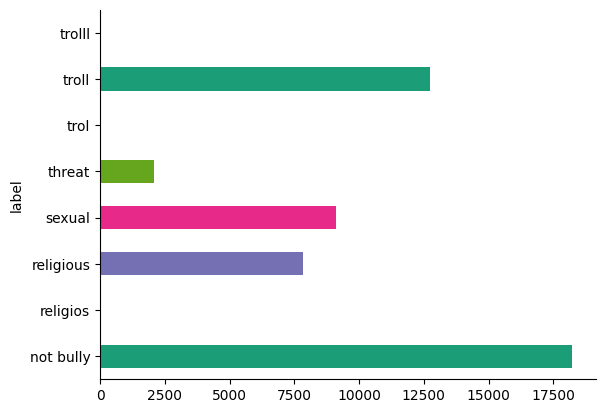

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.shape
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = pd.DataFrame(data)

def remove_non_bengali_characters(text):
    bengali_pattern = re.compile(r'[^\u0980-\u09FF\s]')
    return bengali_pattern.sub('', text)

bengali_stop_words = set(stopwords.words('bengali'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in bengali_stop_words]
    return filtered_words

bengali_stemmer = stemmer.BanglaStemmer()

def stem_tokens(tokens):
    stemmed_tokens = [bengali_stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def preprocess_text(text):
    text = remove_non_bengali_characters(text)
    tokens = tokenize_and_remove_stopwords(text)
    stemmed_tokens = stem_tokens(tokens)
    return ' '.join(stemmed_tokens)

df['processed_comment'] = df['comment'].apply(preprocess_text)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..

In [ ]:
print(df.head())
print("\nClass Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

                                             comment  label  \
0                           গরীবেরা এভাবেই শীত কাটায়      6   
1  তাসরিফ তোমায় মিউজিক ভিডিও করতে পাঠানো হয়েছে, ম...      6   
2     জেল থেকে জানাই সবাইকে ' হ্যাপি ভ্যালেন্টাইন ডে      6   
3                   বাবুরে চারদিকে শুধু আগুন আর আগুন      6   
4  যে সংসদে মমতাজের জায়গা হয় সেই সংসদে হিরো আলম ক...      0   

                           processed_comment  
0                      গরীবে এভাবে শীত কাটায়  
1  তাসরিফ তোমায় মিউজিক ভিডি পাঠানো হয় মডেলিং  
2     জেল জানা সবাইকে হ্যাপি ভ্যালেন্টাইন ডে  
3                     বাবুরে চারদি আগুন আগুন  
4           সংসদে মমতাজ জায়গা সংসদে হিরো আলম  

Class Mapping: {'not bully': 0, 'religios': 1, 'religious': 2, 'sexual': 3, 'threat': 4, 'trol': 5, 'troll': 6, 'trolll': 7}


**Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_comment'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_vect, y_train)

y_pred = lr.predict(X_test_vect)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Logistic Regression Accuracy: 0.5392
Precision: 0.5250081023322586
Recall: 0.5392
F1 Score: 0.5158475099546802


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vect, y_train)

y_pred = knn.predict(X_test_vect)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"KNN Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


KNN Accuracy: 0.4426
Precision: 0.45424703158547175
Recall: 0.4426
F1 Score: 0.42854215162834125


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_comment'])
X_seq = tokenizer.texts_to_sequences(df['processed_comment'])
max_length = max(len(x) for x in X_seq)
X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post')

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])
y_one_hot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_one_hot, test_size=0.3, random_state=42)

**CNN**

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))  # Fully connected layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

print("Accuracy:", accuracy_score(y_test_labels, y_pred))

Epoch 1/10
55/55 [==============================] - 138s 2s/step - loss: 1.4837 - accuracy: 0.3600 - val_loss: 1.3700 - val_accuracy: 0.4287
Epoch 2/10
55/55 [==============================] - 127s 2s/step - loss: 1.1398 - accuracy: 0.5289 - val_loss: 1.0504 - val_accuracy: 0.5879
Epoch 3/10
55/55 [==============================] - 118s 2s/step - loss: 0.8819 - accuracy: 0.6650 - val_loss: 0.9609 - val_accuracy: 0.6599
Epoch 4/10
55/55 [==============================] - 126s 2s/step - loss: 0.6896 - accuracy: 0.7727 - val_loss: 0.9942 - val_accuracy: 0.6783
Epoch 5/10
55/55 [==============================] - 121s 2s/step - loss: 0.5582 - accuracy: 0.8274 - val_loss: 1.0254 - val_accuracy: 0.6911
Epoch 6/10
55/55 [==============================] - 135s 2s/step - loss: 0.4609 - accuracy: 0.8615 - val_loss: 1.0901 - val_accuracy: 0.6876
Epoch 7/10
55/55 [==============================] - 123s 2s/step - loss: 0.3975 - accuracy: 0.8806 - val_loss: 1.1187 - val_accuracy: 0.6944
Epoch 8/10
55

In [ ]:
  model = Sequential()
  model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
  model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(len(label_encoder.classes_), activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=1)

  accuracy = model.evaluate(X_test, y_test)[1]
  print("Accuracy:", accuracy)


Epoch 1/5
110/110 [==============================] - 97s 868ms/step - loss: 1.3312 - accuracy: 0.4499 - val_loss: 1.0173 - val_accuracy: 0.6059
Epoch 2/5
110/110 [==============================] - 65s 590ms/step - loss: 0.8495 - accuracy: 0.7019 - val_loss: 0.8455 - val_accuracy: 0.7054
Epoch 3/5
110/110 [==============================] - 63s 578ms/step - loss: 0.5796 - accuracy: 0.8190 - val_loss: 0.8462 - val_accuracy: 0.7220
Epoch 4/5
110/110 [==============================] - 61s 558ms/step - loss: 0.4024 - accuracy: 0.8755 - val_loss: 0.8895 - val_accuracy: 0.7227
Epoch 5/5
469/469 [==============================] - 8s 18ms/step - loss: 0.9129 - accuracy: 0.7274
Accuracy: 0.727400004863739


**Result Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      5475
           1       0.00      0.00      0.00         6
           2       0.83      0.79      0.81      2326
           3       0.59      0.71      0.65      2732
           4       0.67      0.41      0.51       614
           6       0.60      0.64      0.62      3847

    accuracy                           0.70     15000
   macro avg       0.58      0.55      0.56     15000
weighted avg       0.71      0.70      0.70     15000



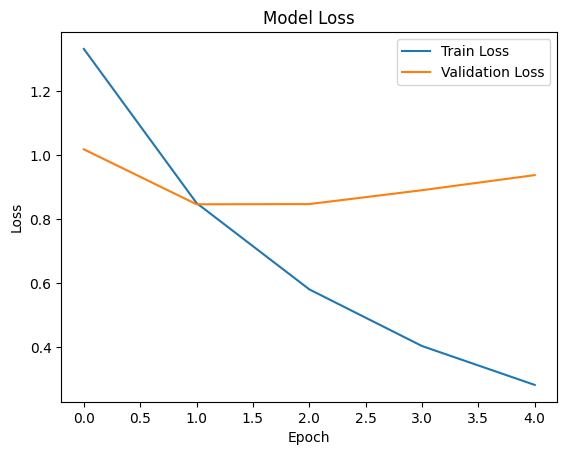

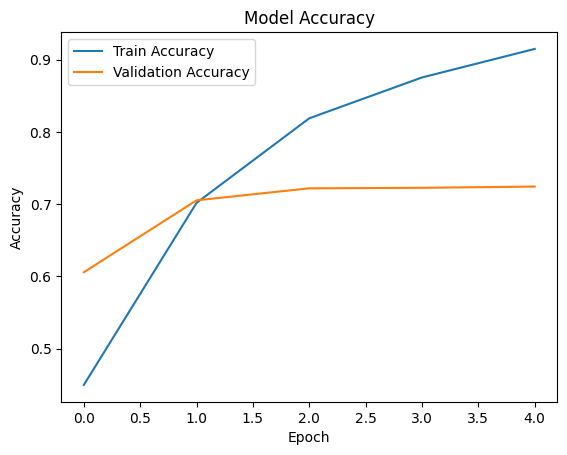

In [ ]:
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

**RNN**

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
rnn_model.add(SimpleRNN(128, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = rnn_model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=1)

y_pred_prob = rnn_model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

print("RNN Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

Epoch 1/5
110/110 [==============================] - 69s 595ms/step - loss: 1.5528 - accuracy: 0.3381 - val_loss: 1.4718 - val_accuracy: 0.3606
Epoch 2/5
110/110 [==============================] - 63s 574ms/step - loss: 1.4671 - accuracy: 0.3624 - val_loss: 1.4588 - val_accuracy: 0.3606
Epoch 3/5
110/110 [==============================] - 75s 687ms/step - loss: 1.4620 - accuracy: 0.3655 - val_loss: 1.4547 - val_accuracy: 0.3606
Epoch 4/5
110/110 [==============================] - 65s 588ms/step - loss: 1.4621 - accuracy: 0.3650 - val_loss: 1.4593 - val_accuracy: 0.3606
Epoch 5/5
469/469 [==============================] - 13s 28ms/step
RNN Accuracy: 0.365

Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53      5475
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00      2326
           3       0.00      0.00      0.00      2732
           4       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**LSTM**

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, verbose=1)

y_pred_prob = lstm_model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

print("LSTM Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))


Epoch 1/10
110/110 [==============================] - 24s 134ms/step - loss: 1.5494 - accuracy: 0.3429 - val_loss: 1.4530 - val_accuracy: 0.3731
Epoch 2/10
110/110 [==============================] - 12s 107ms/step - loss: 1.4692 - accuracy: 0.3554 - val_loss: 1.4479 - val_accuracy: 0.3731
Epoch 3/10
110/110 [==============================] - 11s 100ms/step - loss: 1.4626 - accuracy: 0.3598 - val_loss: 1.4486 - val_accuracy: 0.3731
Epoch 4/10
110/110 [==============================] - 7s 67ms/step - loss: 1.4595 - accuracy: 0.3614 - val_loss: 1.4468 - val_accuracy: 0.3731
Epoch 5/10
110/110 [==============================] - 8s 76ms/step - loss: 1.4584 - accuracy: 0.3618 - val_loss: 1.4485 - val_accuracy: 0.3731
Epoch 6/10
110/110 [==============================] - 7s 62ms/step - loss: 1.4573 - accuracy: 0.3617 - val_loss: 1.4461 - val_accuracy: 0.3731
Epoch 7/10
110/110 [==============================] - 8s 69ms/step - loss: 1.4569 - accuracy: 0.3621 - val_loss: 1.4457 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**GRU**

In [ ]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
gru_model.add(GRU(128, activation='relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Flatten())
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = gru_model.fit(X_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=1)

y_pred_prob = gru_model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

print("GRU Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

Epoch 1/5
55/55 [==============================] - 37s 618ms/step - loss: 1.7349 - accuracy: 0.3128 - val_loss: 1.4841 - val_accuracy: 0.3731
Epoch 2/5
55/55 [==============================] - 27s 496ms/step - loss: 1.4884 - accuracy: 0.3417 - val_loss: 1.4551 - val_accuracy: 0.3731
Epoch 3/5
55/55 [==============================] - 25s 464ms/step - loss: 1.4682 - accuracy: 0.3559 - val_loss: 1.4487 - val_accuracy: 0.3731
Epoch 4/5
55/55 [==============================] - 24s 431ms/step - loss: 1.4638 - accuracy: 0.3596 - val_loss: 1.4506 - val_accuracy: 0.3731
Epoch 5/5
469/469 [==============================] - 18s 37ms/step
GRU Accuracy: 0.36573333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.37      1.00      0.54      5486
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00      2361
           3       0.00      0.00      0.00      2679
           4       0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
